In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
pd.options.display.max_columns=None

In [3]:
df = pd.read_csv("../archivos_editados/df_completo.csv")
df.shape

(25973, 72)

CREAMOS UN FATAFRAME NUEVO QUEDÁNDONOS SOLO CON LOS DATA Y BUSINESS ANALYST

In [4]:
df_data = df[(df["Q5"] == "Business Analyst") | (df ["Q5"] == "Data Analyst")]
df_data.head(5)

,index,Q3,Q4,Q5,Q6,Q8,Q15,Q20,Q21,Q23,Q25,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q34,age,gender,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER
16,16,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,1-2 years,Energy/Mining,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"2,000-2,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN,50-54,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure SQL Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,Google Data Studio,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure Synapse,NaN,NaN,NaN
32,32,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,R,I do not use machine learning methods,Manufacturing/Fabrication,250-999 employees,NaN,NaN,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,22-24,Nonbinary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,33,Egypt,Bachelor’s degree,Data Analyst,3-5 years,R,I do not use machine learning methods,Non-profit/Service,0-49 employees,No (we do not use ML methods),"7,500-9,999",NaN,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"Notepad++,Jupyter Notebook",Other,None,NaN,NaN,Analyze and understand data to influence produ...,None,30-34,Woman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,MySQL,NaN,SQLite,NaN,MongoDB,NaN,NaN,Microsoft SQL Server,Microsoft Azure SQL Database,Microsoft Azure Cosmos DB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,Google Data Studio,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,China,Some college/university study without earning ...,Data Analyst,< 1 years,Python,1-2 years,Computers/Technology,0-49 employees,No (we do not use ML methods),$0-999,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NVIDIA GPUs,"Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,22-24,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBM Db2,NaN,Microsoft Azure SQL Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Firestore,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,Microsoft Azure Synapse,NaN,NaN,NaN
52,52,South Africa,Master’s degree,Data Analyst,1-3 years,R,1-2 years,Manufacturing/Fabrication,250-999 employees,No (we do not use ML methods),"25,000-29,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","R, SQL","RStudio ,Jupyter Notebook",None,"Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny","Caret ,Tidymodels","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,Microsoft Power BI,40-44,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

VAMOS A FILTRAR POR LA COLUMNA Q7 PARA VER LOS LENGUAJES MÁS UTILIZADOS

QUE LENGUAJES SE UTILIZAN MÁS

In [5]:
lista_lenguajes = ["Python", "R", "SQL", "C[^\+]", "C\+\+" ,"Java", "Javascript", "Julia", "Swift", "Bash", "MATLAB", "Other", "None" ]


In [6]:
lista_lenguajes

['Python',
 'R',
 'SQL',
 'C[^\\+]',
 'C\\+\\+',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'Other',
 'None']

In [7]:
#CREAMOS UNA FUNCION PARA ITERAR POR TODA LA COLUMNA

def lenguajes (columna,lista):
    valores = []
    for elemento in lista:
        valor = columna.str.contains(elemento, case = True, regex = True).sum() 
        valores.append(valor)
    return valores

In [8]:
lista_valores = lenguajes(df_data["Q7"], lista_lenguajes)

In [9]:
lista_valores

[2465, 928, 1866, 192, 288, 505, 327, 21, 20, 131, 230, 300, 59]

In [10]:
lista_data = lista_lenguajes , lista_valores

In [11]:
lista_data

(['Python',
  'R',
  'SQL',
  'C[^\\+]',
  'C\\+\\+',
  'Java',
  'Javascript',
  'Julia',
  'Swift',
  'Bash',
  'MATLAB',
  'Other',
  'None'],
 [2465, 928, 1866, 192, 288, 505, 327, 21, 20, 131, 230, 300, 59])

In [12]:
df_lenguajes = pd.DataFrame(lista_data).T

In [13]:
nombre_columnas = {0: "Lenguajes", 1: "Cantidad_de_usuarios"} ## cambiamos el nombre a las columnas

In [14]:
df_lenguajes.rename(columns = nombre_columnas, inplace = True)

In [15]:
df_lenguajes = df_lenguajes.sort_values(by = "Cantidad_de_usuarios", ascending = False)
df_lenguajes

,Lenguajes,Cantidad_de_usuarios
0,Python,2465
2,SQL,1866
1,R,928
5,Java,505
6,Javascript,327
11,Other,300
4,C\+\+,288
10,MATLAB,230
3,C[^\+],192
9,Bash,131


    Los lenguajes más utilizados claramente son Python y SQL, que son los mismos que utiliza Adalab. Creamos una gráfica para su mejor visualización.

<AxesSubplot:xlabel='Cantidad_de_usuarios', ylabel='Lenguajes'>

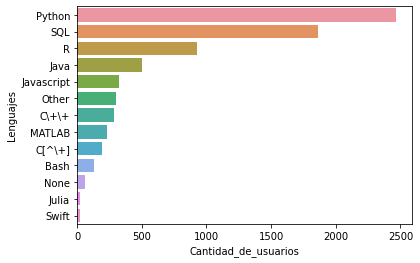

In [16]:
sns.barplot(data = df_lenguajes, x='Cantidad_de_usuarios', y = "Lenguajes"  )

VAMOS A FILTRAR POR LA COLUMNA Q8 PARA VER LOS LENGUAJES MÁS RECOMENDADOS

QUE LENGUAJES RECOMIENDAN

In [17]:
lista_lenguajes

['Python',
 'R',
 'SQL',
 'C[^\\+]',
 'C\\+\\+',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'Other',
 'None']

In [18]:
df_data["Q8"].unique()

array(['Python', 'R', 'C', 'SQL', nan, 'Java', 'C++', 'MATLAB', 'Other',
       'Julia', 'Javascript', 'Bash', 'None', 'Swift'], dtype=object)

In [19]:
lista_lenguajes2 = ["Python", "R", "SQL", "C[^\+]", "C\+\+" ,"Java", "Javascript", "Julia", "Swift", "Bash", "MATLAB", "Other", "None" ]

In [20]:
lista_valores2 = lenguajes(df_data["Q8"], lista_lenguajes2)
lista_valores2

[2195, 263, 349, 0, 39, 43, 13, 14, 1, 6, 20, 24, 14]

In [21]:
valor2 = df_data["Q8"].str.contains("C[^\+]", case=True, regex = True)
valor2

16       False
32       False
33       False
46       False
52       False
         ...  
25959    False
25965    False
25966    False
25968    False
25972      NaN
Name: Q8, Length: 3269, dtype: object

In [22]:
df_data[df_data["Q8"]== "C"]["Q8"].str.contains("C[^\+]", regex = True)

82       False
644      False
4765     False
4891     False
4937     False
6912     False
8450     False
8583     False
8616     False
8690     False
10892    False
12147    False
12203    False
12621    False
12872    False
14223    False
14251    False
16195    False
16934    False
21684    False
22089    False
22578    False
23018    False
24694    False
25099    False
Name: Q8, dtype: bool

In [55]:

def lenguajes2 (columna,lista):
    valores = []
    for elemento in lista:
        for col in columna:
            try:
                valor = re.findall(elemento, col)
                print(elemento)
                
                print(valor)
                print("...................")
                valores.append(valor)
            except:
                return elemento
    return valores

In [56]:
df_data.dtypes

Q3               object
Q4               object
Q5               object
Q6               object
Q8               object
                  ...  
Q34_B_Part_13    object
Q34_B_Part_14    object
Q34_B_Part_15    object
Q34_B_Part_16    object
Q34_B_OTHER      object
Length: 71, dtype: object

In [57]:
lenguajes2(df_data["Q8"], lista_lenguajes)

Python
['Python']
...................
Python
[]
...................
Python
[]
...................
Python
['Python']
...................
Python
[]
...................
Python
['Python']
...................
Python
['Python']
...................
Python
['Python']
...................
Python
['Python']
...................
Python
[]
...................
Python
['Python']
...................
Python
['Python']
...................
Python
['Python']
...................
Python
['Python']
...................
Python
['Python']
...................
Python
['Python']
...................
Python
['Python']
...................
Python
[]
...................
Python
['Python']
...................


'Python'

In [44]:
lista_data2 = lista_lenguajes , lista_valores2

In [26]:
df_data.head()

,index,Q3,Q4,Q5,Q6,Q8,Q15,Q20,Q21,Q23,Q25,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q34,age,gender,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER
16,16,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,1-2 years,Energy/Mining,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"2,000-2,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN,50-54,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure SQL Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,Google Data Studio,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure Synapse,NaN,NaN,NaN
32,32,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,R,I do not use machine learning methods,Manufacturing/Fabrication,250-999 employees,NaN,NaN,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,22-24,Nonbinary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,33,Egypt,Bachelor’s degree,Data Analyst,3-5 years,R,I do not use machine learning methods,Non-profit/Service,0-49 employees,No (we do not use ML methods),"7,500-9,999",NaN,NaN,"Basic statistical software (Microsoft Excel, G...",Python,"Notepad++,Jupyter Notebook",Other,None,NaN,NaN,Analyze and understand data to influence produ...,None,30-34,Woman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,MySQL,NaN,SQLite,NaN,MongoDB,NaN,NaN,Microsoft SQL Server,Microsoft Azure SQL Database,Microsoft Azure Cosmos DB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,Google Data Studio,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,46,China,Some college/university study without earning ...,Data Analyst,< 1 years,Python,1-2 years,Computers/Technology,0-49 employees,No (we do not use ML methods),$0-999,NaN,NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NVIDIA GPUs,"Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,22-24,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBM Db2,NaN,Microsoft Azure SQL Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Firestore,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,Microsoft Azure Synapse,NaN,NaN,NaN
52,52,South Africa,Master’s degree,Data Analyst,1-3 years,R,1-2 years,Manufacturing/Fabrication,250-999 employees,No (we do not use ML methods),"25,000-29,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","R, SQL","RStudio ,Jupyter Notebook",None,"Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny","Caret ,Tidymodels","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,Microsoft Power BI,40-44,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [27]:
lista_data2

(['Python',
  'R',
  'SQL',
  'C[^\\+]',
  'C\\+\\+',
  'Java',
  'Javascript',
  'Julia',
  'Swift',
  'Bash',
  'MATLAB',
  'Other',
  'None'],
 [2195, 263, 349, 0, 39, 43, 13, 14, 1, 6, 20, 24, 14])

In [28]:
df_data.set_index("index", inplace=True)

In [29]:
df_data.head(2)

,Q3,Q4,Q5,Q6,Q8,Q15,Q20,Q21,Q23,Q25,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q34,age,gender,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,Belgium,Bachelor’s degree,Data Analyst,20+ years,Python,1-2 years,Energy/Mining,"1000-9,999 employees",We are exploring ML methods (and may one day p...,"2,000-2,999",NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN,50-54,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure SQL Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Power BI,NaN,Google Data Studio,NaN,Tableau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Microsoft Azure Synapse,NaN,NaN,NaN
32,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,R,I do not use machine learning methods,Manufacturing/Fabrication,250-999 employees,NaN,NaN,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,22-24,Nonbinary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_data["Q6"].unique()

array(['20+ years', '< 1 years', '3-5 years', '1-3 years', '5-10 years',
       'I have never written code', '10-20 years'], dtype=object)

<AxesSubplot:xlabel='Q6', ylabel='count'>

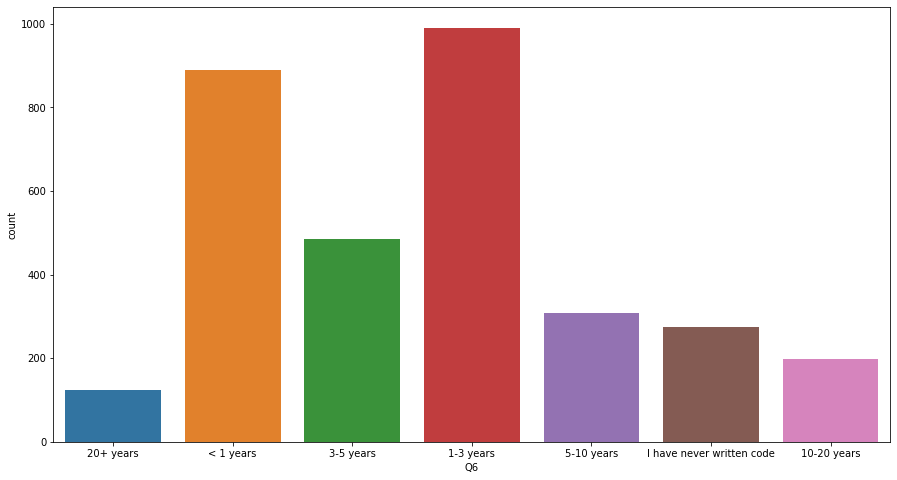

In [39]:
plt.figure(figsize = (15,8))
sns.countplot(x= df_data["Q6"], data = df_data)

Vemos que la mayoría de analistas tienen menos de 5 años de experiencia.

<AxesSubplot:xlabel='Q8', ylabel='count'>

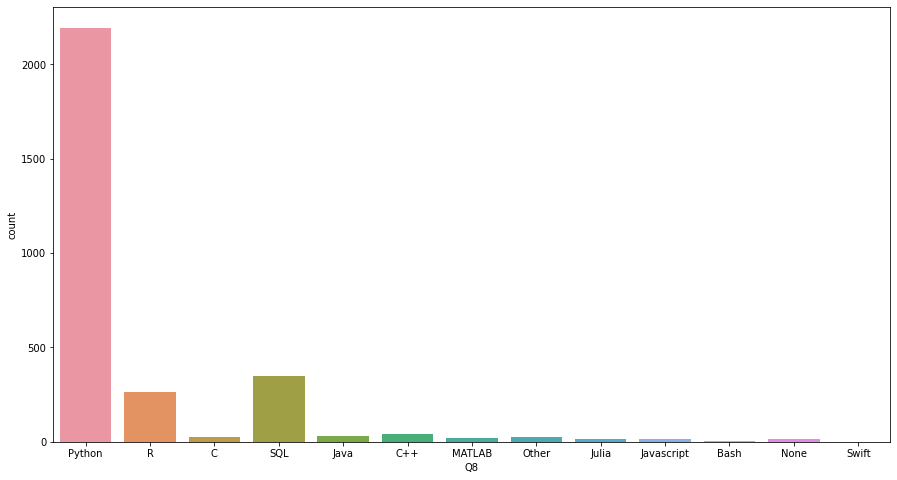

In [63]:
plt.figure(figsize = (15,8))
sns.countplot(x= df_data["Q8"], data = df_data)
#plt.ylim(0, 10)

La mayoría de analistas recomiendan empezar estudiando python y, en menor medida, SQL y R.

In [111]:
lista_entornos = ["JupyterLab", "RStudio", "Visual Studio", "Visual Studio Code (VSCode)", "PyCharm", "Spyder", "Notepad++", "Sublime Text",
                  "Vim", "Emacs", "MATLAB", "Jupyter Notebook", "None","Other"]

In [112]:
def entornos(columna,lista):
    valores = []
    for elemento in lista:
        valor = columna.str.contains(elemento, regex = True).sum() 
        print(valor)
        #valores.append(valor)
    #return valores

In [113]:
valores_entornos = entornos(df_data["Q9"], lista_entornos)

634
820
1144
166
0
728
476


/tmp/ipykernel_1897/3830946809.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valor = columna.str.contains(elemento, regex = True).sum()


error: multiple repeat at position 8

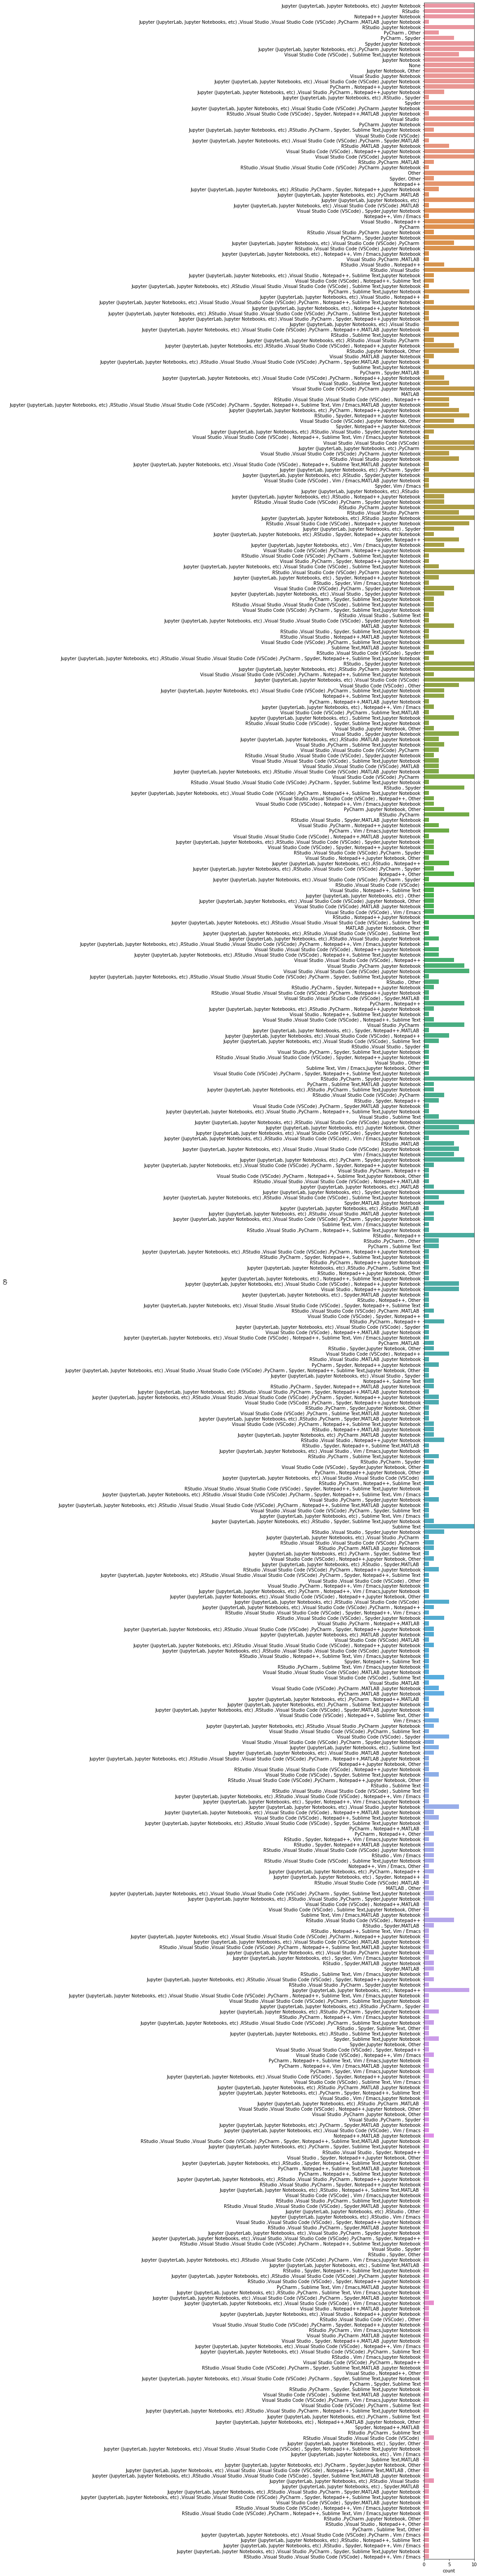

In [107]:
plt.figure(figsize = (15,80))
sns.countplot(y= df_data["Q9"], data = df_data)
plt.xlim(0, 10)
plt.tight_layout()